# Module 5: Data Analysis!

## Topic 1: Data Analysis Start to Finish - Part 1

### First import the library

In [1]:
import pandas as pd

### Now we can bring in our dataset as a dataframe and assign it to a variable

In [2]:
kick_all = pd.read_csv('ks-projects-201801.csv',index_col='ID')

### With that done, we can take a quick peek at the shape and some of the data in the dataframe

In [3]:
print(kick_all.shape)
kick_all.head()

(378661, 14)


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


### Let's have a look at the shape of the backers because I'm interested in analyzing it

In [4]:
kick_all['backers'].value_counts(bins=10)

(-219.383, 21938.2]     378593
(21938.2, 43876.4]          44
(65814.6, 87752.8]          11
(43876.4, 65814.6]           9
(87752.8, 109691.0]          2
(197443.8, 219382.0]         1
(153567.4, 175505.6]         1
(175505.6, 197443.8]         0
(131629.2, 153567.4]         0
(109691.0, 131629.2]         0
Name: backers, dtype: int64

### It appears to be heavily skewed in the low end with a long tail of larger counts

### Let's break that data into equally sized buckets and see how that looks

In [5]:
pd.qcut(kick_all['backers'], q=6)

ID
1000002330    (-0.001, 1.0]
1000003930     (12.0, 34.0]
1000004038       (1.0, 3.0]
1000007540    (-0.001, 1.0]
1000011046     (12.0, 34.0]
                  ...      
999976400     (-0.001, 1.0]
999977640       (3.0, 12.0]
999986353     (-0.001, 1.0]
999987933       (3.0, 12.0]
999988282      (12.0, 34.0]
Name: backers, Length: 378661, dtype: category
Categories (6, interval[float64]): [(-0.001, 1.0] < (1.0, 3.0] < (3.0, 12.0] < (12.0, 34.0] < (34.0, 94.0] < (94.0, 219382.0]]

### There are a lot of projects in here that are small and I don't want them.  I'm going to cut off any project that got less than 20 backers

### I'm going to first create a list of the row IDs that need to be removed

In [6]:
kick_rows_to_delete = kick_all[kick_all["backers"]<20].index
print(kick_rows_to_delete.shape)
kick_rows_to_delete = list(kick_rows_to_delete)
print(kick_rows_to_delete[0:10])

(217405,)
[1000002330, 1000003930, 1000004038, 1000007540, 1000011046, 1000023410, 100004721, 1000055792, 1000056157, 1000064368]


### I can now use that list to drop the matching rows from the dataframe and assign the result to a new dataframe

In [7]:
kick_20_backers = kick_all.drop(kick_rows_to_delete)
print(kick_20_backers.head())
kick_20_backers.shape

                                                         name        category  \
ID                                                                              
1000014025                               Monarch Espresso Bar     Restaurants   
1000030581  Chaser Strips. Our Strips make Shots their B*tch!          Drinks   
1000034518  SPIN - Premium Retractable In-Ear Headphones w...  Product Design   
100004195   STUDIO IN THE SKY - A Documentary Feature Film...     Documentary   
100005484                                    Lisa Lim New CD!      Indie Rock   

           main_category currency    deadline      goal             launched  \
ID                                                                             
1000014025          Food      USD  2016-04-01   50000.0  2016-02-26 13:38:27   
1000030581          Food      USD  2016-03-17   25000.0  2016-02-01 20:05:12   
1000034518        Design      USD  2014-05-29  125000.0  2014-04-24 18:14:43   
100004195   Film & Video      US

(161256, 14)

## Topic 2: Data Analysis Start to Finish - Part 2

### I'm going to sort the new dataframe by backers to see the most backed projects

In [8]:
kick_20_backers.sort_values(by=["backers"], ascending=False, inplace=True)
kick_20_backers.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,10000.0,2015-01-20 19:00:19,8782571.99,successful,219382,US,8782571.99,8782571.99,10000.0
1386523707,Fidget Cube: A Vinyl Desk Toy,Product Design,Design,USD,2016-10-20,15000.0,2016-08-30 22:02:09,6465690.30,successful,154926,US,13770.00,6465690.30,15000.0
557230947,"Bring Reading Rainbow Back for Every Child, Ev...",Web,Technology,USD,2014-07-02,1000000.0,2014-05-28 15:05:45,5408916.95,successful,105857,US,5408916.95,5408916.95,1000000.0
1755266685,The Veronica Mars Movie Project,Narrative Film,Film & Video,USD,2013-04-13,2000000.0,2013-03-13 15:42:22,5702153.38,successful,91585,US,5702153.38,5702153.38,2000000.0
1929840910,Double Fine Adventure,Video Games,Games,USD,2012-03-14,400000.0,2012-02-09 02:52:52,3336371.92,successful,87142,US,3336371.92,3336371.92,400000.0


### I'm curious what categories of projects get the most backing so I'm going to groupby

In [9]:
kick_20_group_main_cat = kick_20_backers.groupby("main_category")
kick_20_group_main_cat = kick_20_group_main_cat.sum()

### These are big numbers so they'll get output in scientific notation so I'm going to override that

In [10]:
kick_20_group_main_cat.head(15).style.format("{:.1f}") #suppresses scientific notation

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
main_category,,,,,,
Art,142146470.2,95720660.4,1105640.0,66817995.0,85404923.7,142856680.3
Comics,52849281.0,73553239.7,1433486.0,56942471.8,70473173.5,49536295.1
Crafts,26515268.0,16291240.0,214628.0,9433316.9,13132416.8,23759516.5
Dance,14070259.2,13097024.9,151584.0,10534262.4,12292145.6,13013578.3
Design,494352526.9,805559046.9,7177831.0,506100782.5,726617119.8,435855051.4
Fashion,118859029.2,143705459.0,1341225.0,93816861.4,125550275.7,103389553.4
Film & Video,771951714.7,386772721.6,4027937.0,333189177.4,374675340.1,750292426.3
Food,162878612.0,126530496.1,1269879.0,99943098.0,121344331.0,156051248.4
Games,610839312.0,765489923.5,11254242.0,570992825.4,737073700.3,568546244.9


### Now I want to see what the highest total goal category and figure out the average pledge per backer in each category

In [11]:
kick_20_group_main_cat.sort_values(by=["goal"], ascending=False, inplace=True)
kick_20_group_main_cat['pledge_per_backer'] = kick_20_group_main_cat["pledged"]/kick_20_group_main_cat['backers']
kick_20_group_main_cat.head(15).style.format("{:.1f}") #suppresses scientific notation

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,pledge_per_backer
main_category,,,,,,,
Film & Video,771951714.7,386772721.6,4027937.0,333189177.4,374675340.1,750292426.3,96.0
Technology,645186190.7,721686069.4,5271772.0,496093947.3,676696389.7,596940092.2,136.9
Games,610839312.0,765489923.5,11254242.0,570992825.4,737073700.3,568546244.9,68.0
Design,494352526.9,805559046.9,7177831.0,506100782.5,726617119.8,435855051.4,112.2
Publishing,239919352.4,138296315.2,2129121.0,98400524.4,127355233.1,227064893.8,65.0
Music,233561203.0,192226348.8,2591641.0,159458528.5,186034631.1,222294614.3,74.2
Food,162878612.0,126530496.1,1269879.0,99943098.0,121344331.0,156051248.4,99.6
Art,142146470.2,95720660.4,1105640.0,66817995.0,85404923.7,142856680.3,86.6
Fashion,118859029.2,143705459.0,1341225.0,93816861.4,125550275.7,103389553.4,107.1


In [12]:
kick_20_group_main_cat.tail(15).style.format("{:.1f}") #suppresses scientific notation

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,pledge_per_backer
main_category,,,,,,,
Film & Video,771951714.7,386772721.6,4027937.0,333189177.4,374675340.1,750292426.3,96.0
Technology,645186190.7,721686069.4,5271772.0,496093947.3,676696389.7,596940092.2,136.9
Games,610839312.0,765489923.5,11254242.0,570992825.4,737073700.3,568546244.9,68.0
Design,494352526.9,805559046.9,7177831.0,506100782.5,726617119.8,435855051.4,112.2
Publishing,239919352.4,138296315.2,2129121.0,98400524.4,127355233.1,227064893.8,65.0
Music,233561203.0,192226348.8,2591641.0,159458528.5,186034631.1,222294614.3,74.2
Food,162878612.0,126530496.1,1269879.0,99943098.0,121344331.0,156051248.4,99.6
Art,142146470.2,95720660.4,1105640.0,66817995.0,85404923.7,142856680.3,86.6
Fashion,118859029.2,143705459.0,1341225.0,93816861.4,125550275.7,103389553.4,107.1


### Now to have a look at just the biggest categories

In [13]:
kick_20_group_main_cat_trimmed = kick_20_group_main_cat[kick_20_group_main_cat["goal"]>100000000]

In [14]:
kick_20_group_main_cat_trimmed.head(15).style.format("{:.1f}") #suppresses scientific notation

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,pledge_per_backer
main_category,,,,,,,
Film & Video,771951714.7,386772721.6,4027937.0,333189177.4,374675340.1,750292426.3,96.0
Technology,645186190.7,721686069.4,5271772.0,496093947.3,676696389.7,596940092.2,136.9
Games,610839312.0,765489923.5,11254242.0,570992825.4,737073700.3,568546244.9,68.0
Design,494352526.9,805559046.9,7177831.0,506100782.5,726617119.8,435855051.4,112.2
Publishing,239919352.4,138296315.2,2129121.0,98400524.4,127355233.1,227064893.8,65.0
Music,233561203.0,192226348.8,2591641.0,159458528.5,186034631.1,222294614.3,74.2
Food,162878612.0,126530496.1,1269879.0,99943098.0,121344331.0,156051248.4,99.6
Art,142146470.2,95720660.4,1105640.0,66817995.0,85404923.7,142856680.3,86.6
Fashion,118859029.2,143705459.0,1341225.0,93816861.4,125550275.7,103389553.4,107.1


## Topic 3: Data Analysis Start to Finish - Part 3

### It's hard to do any decent analysis on the backer counts because they aren't discrete.  I'm going to create buckets of backer counts so I can see the data easier

In [15]:
kick_20_backers["backer_groups"] = pd.cut(kick_20_backers.backers,[0,50,100,200,500,1000,2000,5000,10000,100000000])

In [16]:
kick_20_backers.head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,backer_groups
ID,,,,,,,,,,,,,,,
1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,10000.0,2015-01-20 19:00:19,8782571.99,successful,219382,US,8782571.99,8782571.99,10000.00,"(10000, 100000000]"
1386523707,Fidget Cube: A Vinyl Desk Toy,Product Design,Design,USD,2016-10-20,15000.0,2016-08-30 22:02:09,6465690.30,successful,154926,US,13770.00,6465690.30,15000.00,"(10000, 100000000]"
557230947,"Bring Reading Rainbow Back for Every Child, Ev...",Web,Technology,USD,2014-07-02,1000000.0,2014-05-28 15:05:45,5408916.95,successful,105857,US,5408916.95,5408916.95,1000000.00,"(10000, 100000000]"
1755266685,The Veronica Mars Movie Project,Narrative Film,Film & Video,USD,2013-04-13,2000000.0,2013-03-13 15:42:22,5702153.38,successful,91585,US,5702153.38,5702153.38,2000000.00,"(10000, 100000000]"
1929840910,Double Fine Adventure,Video Games,Games,USD,2012-03-14,400000.0,2012-02-09 02:52:52,3336371.92,successful,87142,US,3336371.92,3336371.92,400000.00,"(10000, 100000000]"
1118803016,Bears vs Babies - A Card Game,Tabletop Games,Games,USD,2016-11-18,10000.0,2016-10-18 18:59:32,3215679.79,successful,85581,US,1231455.60,3215679.79,10000.00,"(10000, 100000000]"
1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,500000.0,2015-02-24 15:44:42,20338986.27,successful,78471,US,20338986.27,20338986.27,500000.00,"(10000, 100000000]"
286165030,Torment: Tides of Numenera,Video Games,Games,USD,2013-04-06,900000.0,2013-03-06 14:47:37,4188927.49,successful,74405,US,4188927.49,4188927.49,900000.00,"(10000, 100000000]"
458565935,Project Eternity,Video Games,Games,USD,2012-10-17,1100000.0,2012-09-14 19:01:04,3986929.49,successful,73986,US,3986929.49,3986929.49,1100000.00,"(10000, 100000000]"


### With my new buckets, I can do some counts

In [17]:
kick_20_backers['backer_groups'].value_counts()

(0, 50]               60097
(50, 100]             41210
(100, 200]            28309
(200, 500]            18950
(500, 1000]            6538
(1000, 2000]           3542
(2000, 5000]           1837
(5000, 10000]           522
(10000, 100000000]      251
Name: backer_groups, dtype: int64

### Let's see if more backers make for a higher chance of success.  First I'll create a frame that is just the columns I'm interested in

In [18]:
kick_success_by_backers = kick_20_backers.loc[:,["backer_groups","state"]]
print(kick_success_by_backers)

                 backer_groups       state
ID                                        
1955357092  (10000, 100000000]  successful
1386523707  (10000, 100000000]  successful
557230947   (10000, 100000000]  successful
1755266685  (10000, 100000000]  successful
1929840910  (10000, 100000000]  successful
...                        ...         ...
227211348              (0, 50]  successful
1820873794             (0, 50]        live
1009757842             (0, 50]  successful
1452688704             (0, 50]      failed
1905906288             (0, 50]  successful

[161256 rows x 2 columns]


### With that data, I can now get counts by state by backer group

In [19]:
kick_success_by_backers.groupby('backer_groups')['state'].value_counts()

backer_groups       state     
(0, 50]             successful    34360
                    failed        21105
                    canceled       4130
                    live            370
                    suspended       132
(50, 100]           successful    30576
                    failed         8354
                    canceled       1980
                    live            188
                    suspended       112
(100, 200]          successful    23344
                    failed         3604
                    canceled       1168
                    live            108
                    suspended        85
(200, 500]          successful    16565
                    failed         1552
                    canceled        684
                    live             79
                    suspended        70
(500, 1000]         successful     6031
                    failed          284
                    canceled        158
                    suspended        34
         

### While counts are nice, it's easier to see if we look at percentages

In [20]:
kick_success_by_backers.groupby('backer_groups')['state'].value_counts(normalize=True) *100

backer_groups       state     
(0, 50]             successful    57.174235
                    failed        35.118226
                    canceled       6.872223
                    live           0.615671
                    suspended      0.219645
(50, 100]           successful    74.195584
                    failed        20.271779
                    canceled       4.804659
                    live           0.456200
                    suspended      0.271779
(100, 200]          successful    82.461408
                    failed        12.730934
                    canceled       4.125896
                    live           0.381504
                    suspended      0.300258
(200, 500]          successful    87.414248
                    failed         8.189974
                    canceled       3.609499
                    live           0.416887
                    suspended      0.369393
(500, 1000]         successful    92.245335
                    failed         4.343836
 

### It also helps to look at the overall success rate in the data without the backer groups so we have something to compare against.

In [21]:
kick_success_by_backers['state'].value_counts(normalize=True) *100

successful    72.425832
failed        21.700898
canceled       5.082602
live           0.505408
suspended      0.285261
Name: state, dtype: float64

## Topic 4: Data Analysis Start to Finish - Part 4

### No code to show here.  This is just the part of the analysis where you would want to think about what format/structure you need the data in for demonstration/visualization...which is the next module!

# Module 5: Visualization

## Topic 1: Data Visualization Primer

### This topic has some links to good online resources about visualization.  Certain kinds of datasets lend themselves to certain kinds of visualizations

## Topic 2: matplotlib

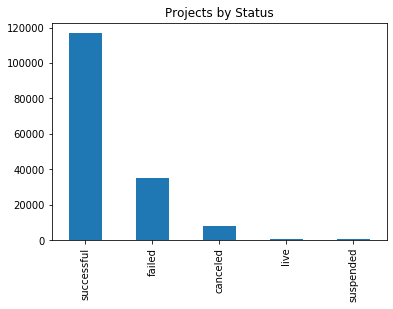

In [29]:
import matplotlib.pyplot as plt
kick_success_by_backers['state'].value_counts().plot(kind='bar',title="Projects by Status")

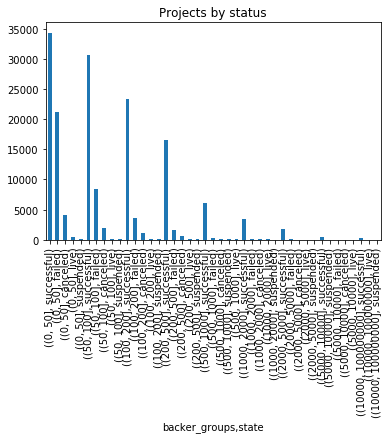

In [31]:
#import matplotlib.pyplot as plt
#fig, ax = plt.subplots()
kick_success_by_backers.groupby('backer_groups')['state'].value_counts().plot(kind='bar',title="Projects by status")
#ax.set(title = "Projects by status")

In [34]:
kick_success_by_backers_group_counts = kick_success_by_backers.groupby(['backer_groups','state']).size()
print(kick_success_by_backers_group_counts.head(10))
#kick_success_by_backers_group_counts = kick_success_by_backers_group_counts[['ID','state','backer_groups']]
#print(kick_success_by_backers_group_counts.head())

backer_groups  state     
(0, 50]        canceled       4130
               failed        21105
               live            370
               successful    34360
               suspended       132
(50, 100]      canceled       1980
               failed         8354
               live            188
               successful    30576
               suspended       112
dtype: int64


[Text(0.5, 1.0, 'Projects by status')]

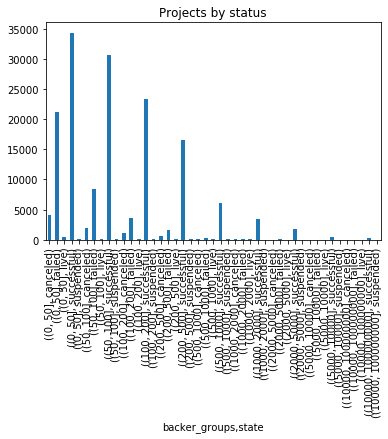

In [35]:
import matplotlib.pyplot as plt
#%matplotlib widget
fig, ax = plt.subplots()
kick_success_by_backers_group_counts.plot(kind='bar')
ax.set(title = "Projects by status")

In [36]:
kick_result = kick_success_by_backers.groupby(['state','backer_groups']).size()
print(kick_result)
print(kick_result.shape)

state       backer_groups     
canceled    (0, 50]                4130
            (50, 100]              1980
            (100, 200]             1168
            (200, 500]              684
            (500, 1000]             158
            (1000, 2000]             51
            (2000, 5000]             20
            (5000, 10000]             5
            (10000, 100000000]        0
failed      (0, 50]               21105
            (50, 100]              8354
            (100, 200]             3604
            (200, 500]             1552
            (500, 1000]             284
            (1000, 2000]             61
            (2000, 5000]             27
            (5000, 10000]             7
            (10000, 100000000]        0
live        (0, 50]                 370
            (50, 100]               188
            (100, 200]              108
            (200, 500]               79
            (500, 1000]              31
            (1000, 2000]             24
         

In [37]:
kick_something = kick_result.reset_index()
print(kick_something)

         state       backer_groups      0
0     canceled             (0, 50]   4130
1     canceled           (50, 100]   1980
2     canceled          (100, 200]   1168
3     canceled          (200, 500]    684
4     canceled         (500, 1000]    158
5     canceled        (1000, 2000]     51
6     canceled        (2000, 5000]     20
7     canceled       (5000, 10000]      5
8     canceled  (10000, 100000000]      0
9       failed             (0, 50]  21105
10      failed           (50, 100]   8354
11      failed          (100, 200]   3604
12      failed          (200, 500]   1552
13      failed         (500, 1000]    284
14      failed        (1000, 2000]     61
15      failed        (2000, 5000]     27
16      failed       (5000, 10000]      7
17      failed  (10000, 100000000]      0
18        live             (0, 50]    370
19        live           (50, 100]    188
20        live          (100, 200]    108
21        live          (200, 500]     79
22        live         (500, 1000]

         state       backer_groups  backer_sum
27  successful             (0, 50]       34360
28  successful           (50, 100]       30576
29  successful          (100, 200]       23344
30  successful          (200, 500]       16565
31  successful         (500, 1000]        6031
32  successful        (1000, 2000]        3396
33  successful        (2000, 5000]        1771
34  successful       (5000, 10000]         499
35  successful  (10000, 100000000]         249


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

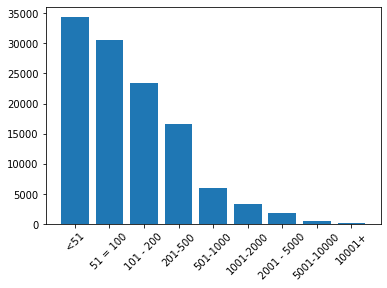

In [39]:
import matplotlib.pyplot as plt
#import numpy as np

fig1 = kick_something[kick_something['state'] == 'successful']
fig1.columns =['state','backer_groups','backer_sum']
print(fig1)
labels = [" <51","51 = 100","101 - 200","201-500","501-1000","1001-2000","2001 - 5000","5001-10000","10001+"]

plt.bar(labels,fig1["backer_sum"])
plt.xticks(rotation=45)

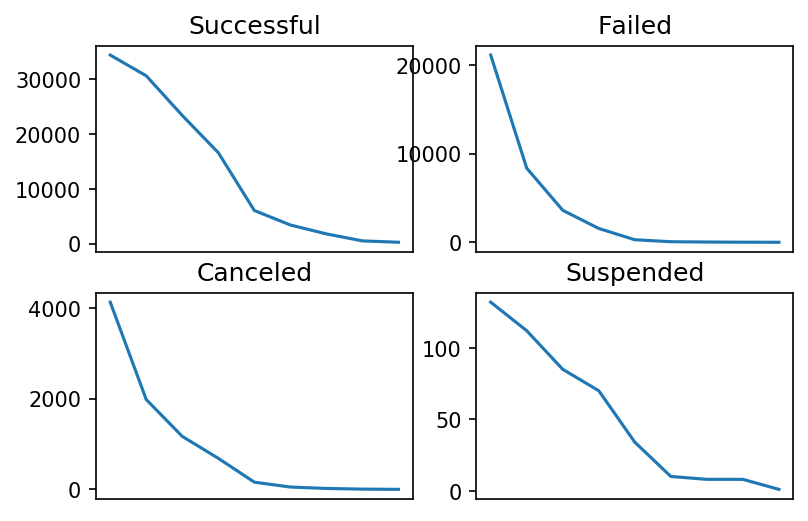

In [41]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150  #Override default figure size

fig,axs = plt.subplots(2,2, gridspec_kw={'width_ratios':[3,3],'height_ratios':[3,3]}) # Can change each figure here

# Creating my data for plotting
fig1 = kick_something[kick_something['state'] == 'successful']
fig2 = kick_something[kick_something['state'] == 'failed']
fig3 = kick_something[kick_something['state'] == 'canceled']
fig4 = kick_something[kick_something['state'] =='suspended']
fig1.columns =['state','backer_groups','backer_sum']
fig2.columns =['state','backer_groups','backer_sum']
fig3.columns =['state','backer_groups','backer_sum']
fig4.columns =['state','backer_groups','backer_sum']

labels = [" <51","51 = 100","101 - 200","201-500","501-1000","1001-2000","2001 - 5000","5001-10000","10001+"]

# Plotting each subplot, disabling x-axis display and titling each subplot
axs[0,0].plot(fig1["backer_sum"])
axs[0,0].axes.get_xaxis().set_visible(False)
axs[0,0].title.set_text("Successful")
axs[0,1].plot(fig2["backer_sum"])
axs[0,1].axes.get_xaxis().set_visible(False)
axs[0,1].title.set_text("Failed")
axs[1,0].plot(fig3["backer_sum"])
axs[1,0].axes.get_xaxis().set_visible(False)
axs[1,0].title.set_text("Canceled")
axs[1,1].plot(fig4["backer_sum"])
axs[1,1].axes.get_xaxis().set_visible(False)
axs[1,1].title.set_text("Suspended")


### I can assign the height of each cell independently

(0, 40000)

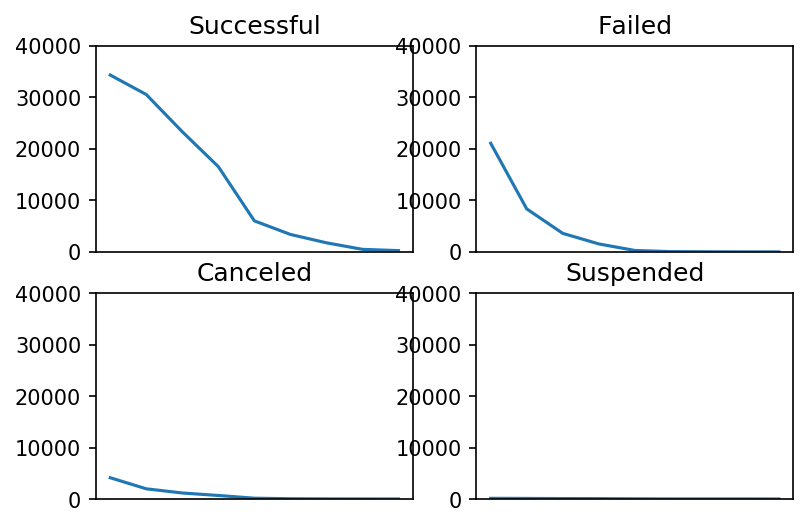

In [42]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150  #Override default figure size

fig, axs = plt.subplots(2,2, gridspec_kw={'width_ratios':[3,3],'height_ratios':[3,3]}) # Can change each figure here

# Creating my data for plotting
fig1 = kick_something[kick_something['state'] == 'successful']
fig2 = kick_something[kick_something['state'] == 'failed']
fig3 = kick_something[kick_something['state'] == 'canceled']
fig4 = kick_something[kick_something['state'] =='suspended']
fig1.columns =['state','backer_groups','backer_sum']
fig2.columns =['state','backer_groups','backer_sum']
fig3.columns =['state','backer_groups','backer_sum']
fig4.columns =['state','backer_groups','backer_sum']

labels = [" <51","51 = 100","101 - 200","201-500","501-1000","1001-2000","2001 - 5000","5001-10000","10001+"]

# Plotting each subplot, disabling x-axis display, titling each subplot, and assigning y-limit
axs[0,0].plot(fig1["backer_sum"])
axs[0,0].axes.get_xaxis().set_visible(False)
axs[0,0].title.set_text("Successful")
axs[0,0].set_ylim(0,40000)


axs[0,1].plot(fig2["backer_sum"])
axs[0,1].axes.get_xaxis().set_visible(False)
axs[0,1].title.set_text("Failed")
axs[0,1].set_ylim(0,40000)


axs[1,0].plot(fig3["backer_sum"])
axs[1,0].axes.get_xaxis().set_visible(False)
axs[1,0].title.set_text("Canceled")
axs[1,0].set_ylim(0,40000)


axs[1,1].plot(fig4["backer_sum"])
axs[1,1].axes.get_xaxis().set_visible(False)
axs[1,1].title.set_text("Suspended")
axs[1,1].set_ylim(0,40000)


### I can assign the subplots to share the same column height using a sharey parameter

Text(0.5, 0.98, 'Campain status counts by backers')

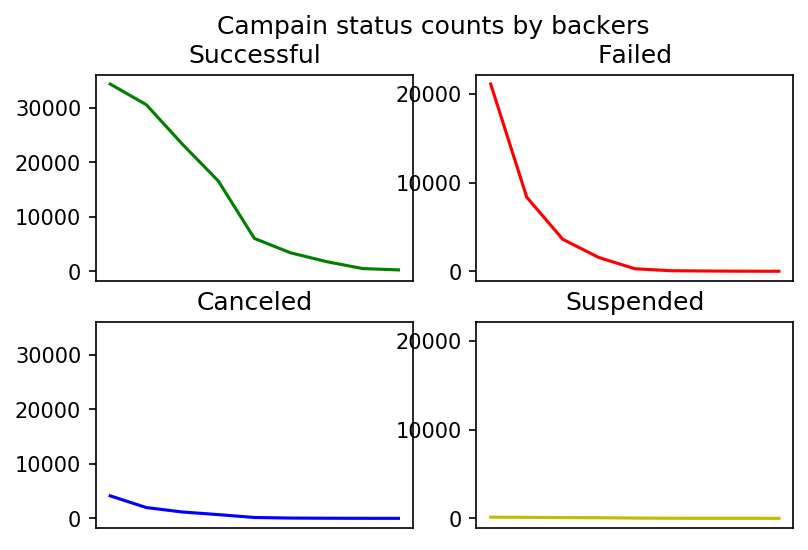

In [43]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150  #Override default figure size

fig, axs = plt.subplots(2,2, gridspec_kw={'width_ratios':[3,3],'height_ratios':[3,3]},sharey="col") # Can change each figure here

# Creating my data for plotting
fig1 = kick_something[kick_something['state'] == 'successful']
fig2 = kick_something[kick_something['state'] == 'failed']
fig3 = kick_something[kick_something['state'] == 'canceled']
fig4 = kick_something[kick_something['state'] =='suspended']
fig1.columns =['state','backer_groups','backer_sum']
fig2.columns =['state','backer_groups','backer_sum']
fig3.columns =['state','backer_groups','backer_sum']
fig4.columns =['state','backer_groups','backer_sum']

labels = [" <51","51 = 100","101 - 200","201-500","501-1000","1001-2000","2001 - 5000","5001-10000","10001+"]

# Plotting each subplot, disabling x-axis display, titling each subplot, assigning y-limit, and adding title
axs[0,0].plot(fig1["backer_sum"],color='g')
axs[0,0].axes.get_xaxis().set_visible(False)
axs[0,0].title.set_text("Successful")


axs[0,1].plot(fig2["backer_sum"],color='r')
axs[0,1].axes.get_xaxis().set_visible(False)
axs[0,1].title.set_text("Failed")


axs[1,0].plot(fig3["backer_sum"],color='b')
axs[1,0].axes.get_xaxis().set_visible(False)
axs[1,0].title.set_text("Canceled")


axs[1,1].plot(fig4["backer_sum"],color='y')
axs[1,1].axes.get_xaxis().set_visible(False)
axs[1,1].title.set_text("Suspended")

fig.suptitle("Campain status counts by backers")

Text(0.5, 0.98, 'Campain status counts by backers')

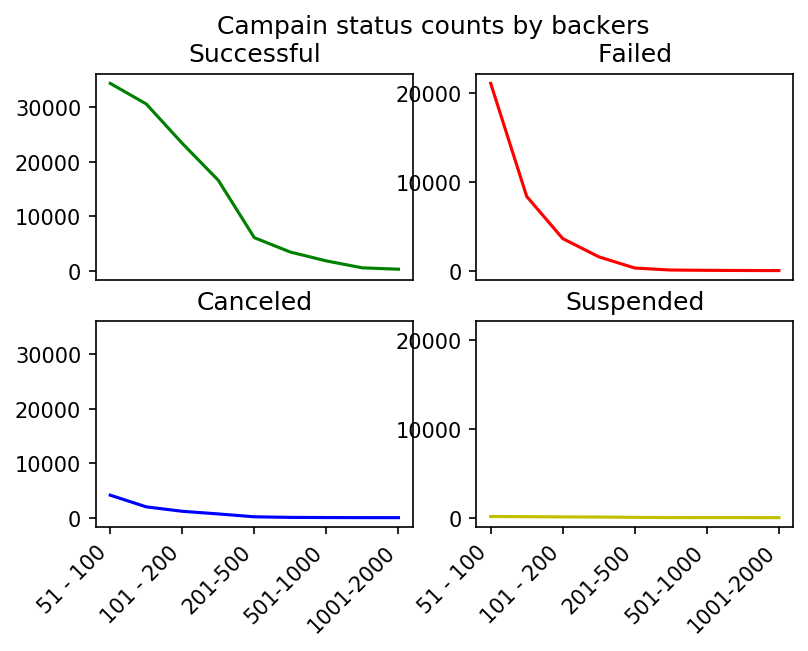

In [44]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150  #Override default figure size

fig, axs = plt.subplots(2,2, gridspec_kw={'width_ratios':[3,3],'height_ratios':[3,3]},sharey="col") # Can change each figure here

# Creating my data for plotting
fig1 = kick_something[kick_something['state'] == 'successful']
fig2 = kick_something[kick_something['state'] == 'failed']
fig3 = kick_something[kick_something['state'] == 'canceled']
fig4 = kick_something[kick_something['state'] =='suspended']

fig1.columns =['state','backer_groups','backer_sum']
fig2.columns =['state','backer_groups','backer_sum']
fig3.columns =['state','backer_groups','backer_sum']
fig4.columns =['state','backer_groups','backer_sum']

labels = [" <51","51 - 100","101 - 200","201-500","501-1000","1001-2000","2001 - 5000","5001-10000","10001+"]


# Plotting each subplot, disabling x-axis display, titling each subplot, assigning y-limit, and adding title
axs[0,0].plot(fig1["backer_sum"],color='g')
axs[0,0].axes.get_xaxis().set_visible(False)
axs[0,0].title.set_text("Successful")


axs[0,1].plot(fig2["backer_sum"],color='r')
axs[0,1].axes.get_xaxis().set_visible(False)
axs[0,1].title.set_text("Failed")


axs[1,0].plot(fig3["backer_sum"],color='b')
axs[1,0].axes.get_xaxis().set_visible(True)
axs[1,0].axes.set_xticklabels(labels,rotation=45,ha='right')
axs[1,0].title.set_text("Canceled")


axs[1,1].plot(fig4["backer_sum"],color='y')
axs[1,1].axes.get_xaxis().set_visible(True)
axs[1,1].axes.set_xticklabels(labels,rotation=45,ha='right')
axs[1,1].title.set_text("Suspended")

fig.suptitle("Campaign status counts by backers")

## Topic 3: matplotlib - Part 2

[34360, 30576, 23344, 16565, 6031, 3396, 1771, 499, 249]
[55465, 38930, 26948, 18117, 6315, 3457, 1798, 506, 249]
[59595, 40910, 28116, 18801, 6473, 3508, 1818, 511, 249]


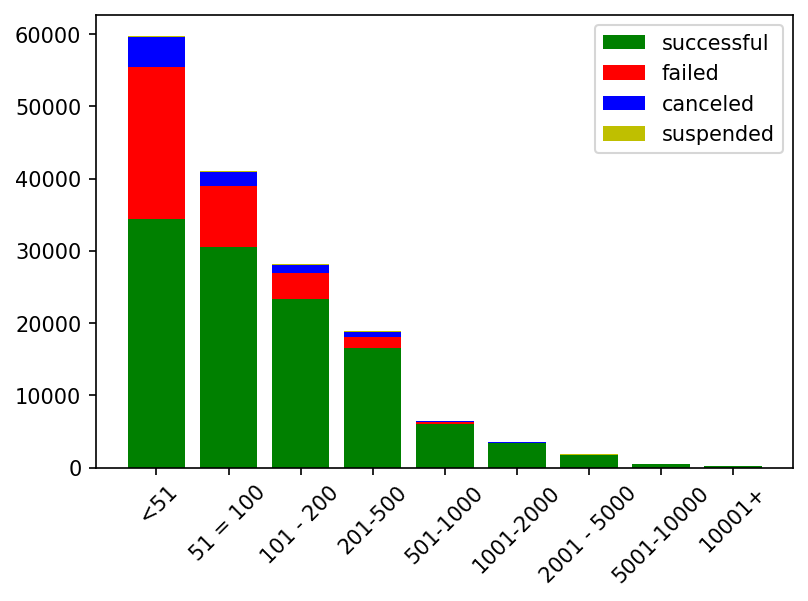

In [47]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150  #Override default figure size


# Creating my data for plotting
fig1 = kick_something[kick_something['state'] == 'successful']
fig2 = kick_something[kick_something['state'] == 'failed']
fig3 = kick_something[kick_something['state'] == 'canceled']
fig4 = kick_something[kick_something['state'] =='suspended']
fig1.columns =['state','backer_groups','backer_sum']
fig2.columns =['state','backer_groups','backer_sum']
fig3.columns =['state','backer_groups','backer_sum']
fig4.columns =['state','backer_groups','backer_sum']

fig2_height = fig1['backer_sum'].tolist()
fig3_height = [sum(x) for x in zip(fig2_height, fig2['backer_sum'].tolist())]
fig4_height = [sum(x) for x in zip(fig3_height,fig3['backer_sum'].tolist())]
print(fig2_height)
print(fig3_height)
print(fig4_height)

labels = [" <51","51 = 100","101 - 200","201-500","501-1000","1001-2000","2001 - 5000","5001-10000","10001+"]


plt.bar(labels,fig1['backer_sum'],color='g',label='successful')
plt.bar(labels,fig2['backer_sum'],bottom=fig1['backer_sum'],color='r',label='failed')
plt.bar(labels,fig3['backer_sum'],bottom=fig3_height,color='b',label='canceled')
plt.bar(labels,fig4['backer_sum'],bottom=fig4_height,color='y',label='suspended')
plt.xticks(rotation=45)
plt.legend()
plt.show()


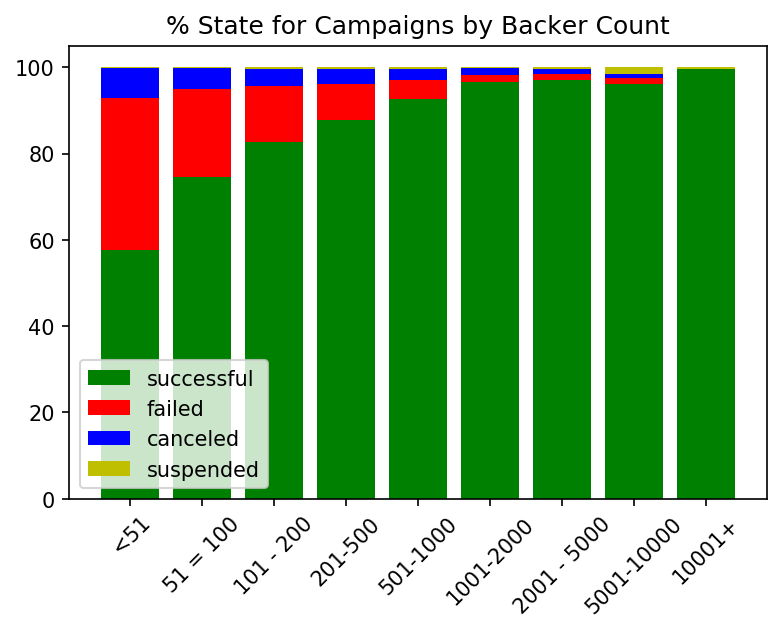

In [46]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150  #Override default figure size

#fig, axs = plt.subplots(2,2, gridspec_kw={'width_ratios':[3,3],'height_ratios':[3,3]},sharey="col") # Can change each figure here

# Creating my data for plotting
fig1 = kick_something[kick_something['state'] == 'successful']
fig2 = kick_something[kick_something['state'] == 'failed']
fig3 = kick_something[kick_something['state'] == 'canceled']
fig4 = kick_something[kick_something['state'] =='suspended']
kick_something.columns = ['state','backer_groups','backer_sum']
fig1.columns =['state','backer_groups','backer_sum']
fig2.columns =['state','backer_groups','backer_sum']
fig3.columns =['state','backer_groups','backer_sum']
fig4.columns =['state','backer_groups','backer_sum']

total_height = [sum(x) for x in zip(fig1['backer_sum'].tolist(),fig2['backer_sum'].tolist(),fig3['backer_sum'].tolist(),fig4['backer_sum'].tolist())]

fig1 = (fig1['backer_sum']/total_height)*100
fig2 = (fig2['backer_sum']/total_height)*100
fig3 = (fig3['backer_sum']/total_height)*100
fig4 = (fig4['backer_sum']/total_height)*100

fig3_height = [sum(x) for x in zip(fig2, fig1)]
fig4_height = [sum(x) for x in zip(fig3, fig2, fig1)]

labels = [" <51","51 = 100","101 - 200","201-500","501-1000","1001-2000","2001 - 5000","5001-10000","10001+"]


plt.bar(labels,fig1,color='g',label='successful')
plt.bar(labels,fig2,bottom=fig1,color='r',label='failed')
plt.bar(labels,fig3,bottom=fig3_height,color='b',label='canceled')
plt.bar(labels,fig4,bottom=fig4_height,color='y',label='suspended')
plt.xticks(rotation=45)
plt.legend()
plt.title('% State for Campaigns by Backer Count')
plt.show()


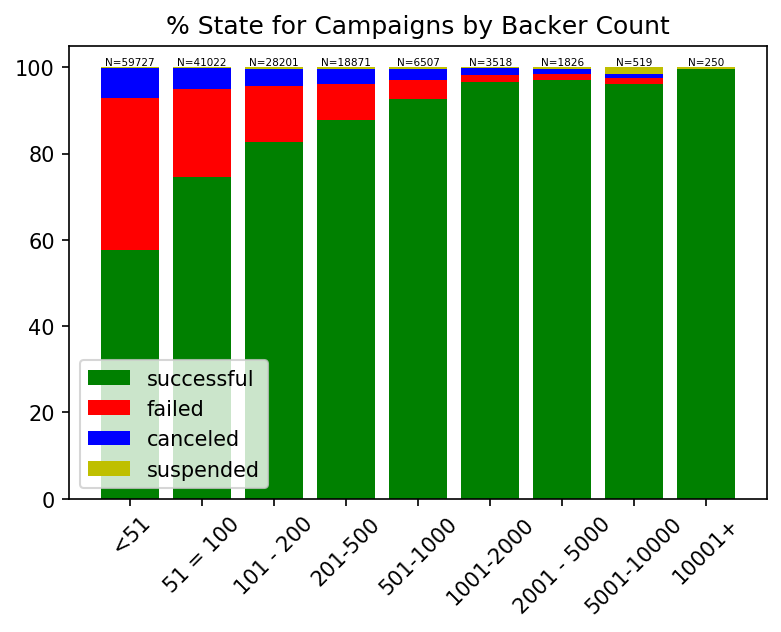

In [48]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150  #Override default figure size

#fig, axs = plt.subplots(2,2, gridspec_kw={'width_ratios':[3,3],'height_ratios':[3,3]},sharey="col") # Can change each figure here

# Creating my data for plotting
fig1 = kick_something[kick_something['state'] == 'successful']
fig2 = kick_something[kick_something['state'] == 'failed']
fig3 = kick_something[kick_something['state'] == 'canceled']
fig4 = kick_something[kick_something['state'] =='suspended']
kick_something.columns = ['state','backer_groups','backer_sum']
fig1.columns =['state','backer_groups','backer_sum']
fig2.columns =['state','backer_groups','backer_sum']
fig3.columns =['state','backer_groups','backer_sum']
fig4.columns =['state','backer_groups','backer_sum']

total_height = [sum(x) for x in zip(fig1['backer_sum'].tolist(),fig2['backer_sum'].tolist(),fig3['backer_sum'].tolist(),fig4['backer_sum'].tolist())]

fig1 = (fig1['backer_sum']/total_height)*100
fig2 = (fig2['backer_sum']/total_height)*100
fig3 = (fig3['backer_sum']/total_height)*100
fig4 = (fig4['backer_sum']/total_height)*100

fig3_height = [sum(x) for x in zip(fig2, fig1)]
fig4_height = [sum(x) for x in zip(fig3, fig2, fig1)]

labels = [" <51","51 = 100","101 - 200","201-500","501-1000","1001-2000","2001 - 5000","5001-10000","10001+"]


plt.bar(labels,fig1,color='g',label='successful')
plt.bar(labels,fig2,bottom=fig1,color='r',label='failed')
plt.bar(labels,fig3,bottom=fig3_height,color='b',label='canceled')
plt.bar(labels,fig4,bottom=fig4_height,color='y',label='suspended')
plt.xticks(rotation=45)
plt.legend()
plt.title('% State for Campaigns by Backer Count')
for xpos,ypos,yval in zip(labels,fig4_height+fig4,total_height):
    plt.text(xpos,ypos,"N=%d"%yval,ha="center",va="bottom",rotation=0,fontsize=5)
plt.show()


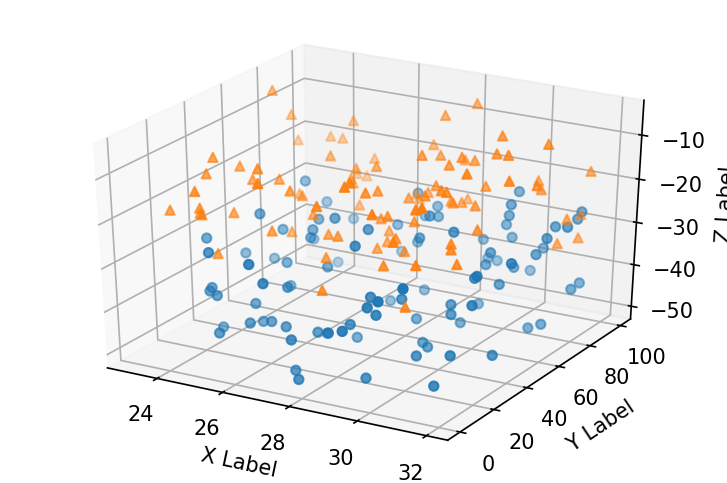

In [49]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()